In [1]:
from micrograd.engine import Value
from micrograd.nn import MLP
from tqdm import tqdm_notebook

# Draw graph

In [2]:
from graphviz import Digraph

def trace(root):
    nodes, edges = [], []
    def build(value):
        if value not in nodes:
            nodes.append(value)
            for child in value._prev:
                edges.append((child, value))
                build(child)            
    build(root)
    return nodes, edges

def draw_dot(root, format="svg", rankdir="LR"):
    # format: svg and png
    # rankdir: LR, TB, RL, BT
    nodes, edges = trace(root)
    dot = Digraph(comment="Computational Graphs", format=format, graph_attr={"rankdir": rankdir})
    
    for n in nodes:
        dot.node(name=str(id(n)), label=f"{n.label} | data {n.data:.4f} | grad {n.grad:.4f}", shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

# Build nn model

In [3]:
# data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

In [4]:
model = MLP(
            n_in=3, 
            n_out=1,
            hiddens=[4,4]
)

In [5]:
model, len(model.parameters())

(MLP:[Layer:[[w:[Value(data=0.7403578385562486), Value(data=0.5031689675502593), Value(data=0.19102409882089)] b:Value(data=-0.7474602802095875)], [w:[Value(data=0.9600239923815659), Value(data=0.12316155367661286), Value(data=0.9507530013375161)] b:Value(data=-0.3695246643793204)], [w:[Value(data=0.6786997883502655), Value(data=-0.8019135467337941), Value(data=0.8782044072659501)] b:Value(data=0.5830188363930593)], [w:[Value(data=0.6151900549663791), Value(data=0.8288895059225816), Value(data=0.15440341113922273)] b:Value(data=-0.14110032754417845)]], Layer:[[w:[Value(data=-0.27465279972734535), Value(data=-0.9921805521831026), Value(data=-0.95861874441784), Value(data=0.46936177514330946)] b:Value(data=0.49474152787033177)], [w:[Value(data=0.07729674619520832), Value(data=0.7685209554958208), Value(data=0.10618828086548082), Value(data=-0.8299932978682885)] b:Value(data=0.7968739099721955)], [w:[Value(data=-0.8056959808531541), Value(data=0.0980922027984894), Value(data=-0.2870117061

In [6]:
def mse_loss(pred, target):
    loss = sum((y_true-y_pred)**2 for y_pred, y_true in zip(pred, target))/len(target)
    return loss

In [7]:
epochs = 200
lr = 0.05

In [8]:
for epoch in tqdm_notebook(range(epochs)):
    # predict
    y_pred = [model(x)[0] for x in xs]
    
    # calculate the loss
    loss = mse_loss(y_pred, ys)
    
    # set zero gradient
    model.zero_grad()
    
    # backward
    loss.backward()
    
    # step optimizer
    model.step(lr)
    
    if epoch % 10 ==0:
        print(f"Epoch: {epoch}| Loss: {loss.data:.4f}")

C:\Users\bJ5xp\AppData\Local\Temp\ipykernel_20000\4069226087.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs)):


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 0| Loss: 0.4673
Epoch: 10| Loss: 0.0965
Epoch: 20| Loss: 0.0512
Epoch: 30| Loss: 0.0326
Epoch: 40| Loss: 0.0232
Epoch: 50| Loss: 0.0177
Epoch: 60| Loss: 0.0142
Epoch: 70| Loss: 0.0118
Epoch: 80| Loss: 0.0100
Epoch: 90| Loss: 0.0087
Epoch: 100| Loss: 0.0077
Epoch: 110| Loss: 0.0068
Epoch: 120| Loss: 0.0062
Epoch: 130| Loss: 0.0056
Epoch: 140| Loss: 0.0051
Epoch: 150| Loss: 0.0047
Epoch: 160| Loss: 0.0044
Epoch: 170| Loss: 0.0041
Epoch: 180| Loss: 0.0038
Epoch: 190| Loss: 0.0036


In [9]:
y_pred = [model(x)[0] for x in xs]
y_pred, ys

([Value(data=0.9517726222895582),
  Value(data=-0.9499794859605165),
  Value(data=-0.923401089857045),
  Value(data=0.9462957909306846)],
 [1.0, -1.0, -1.0, 1.0])

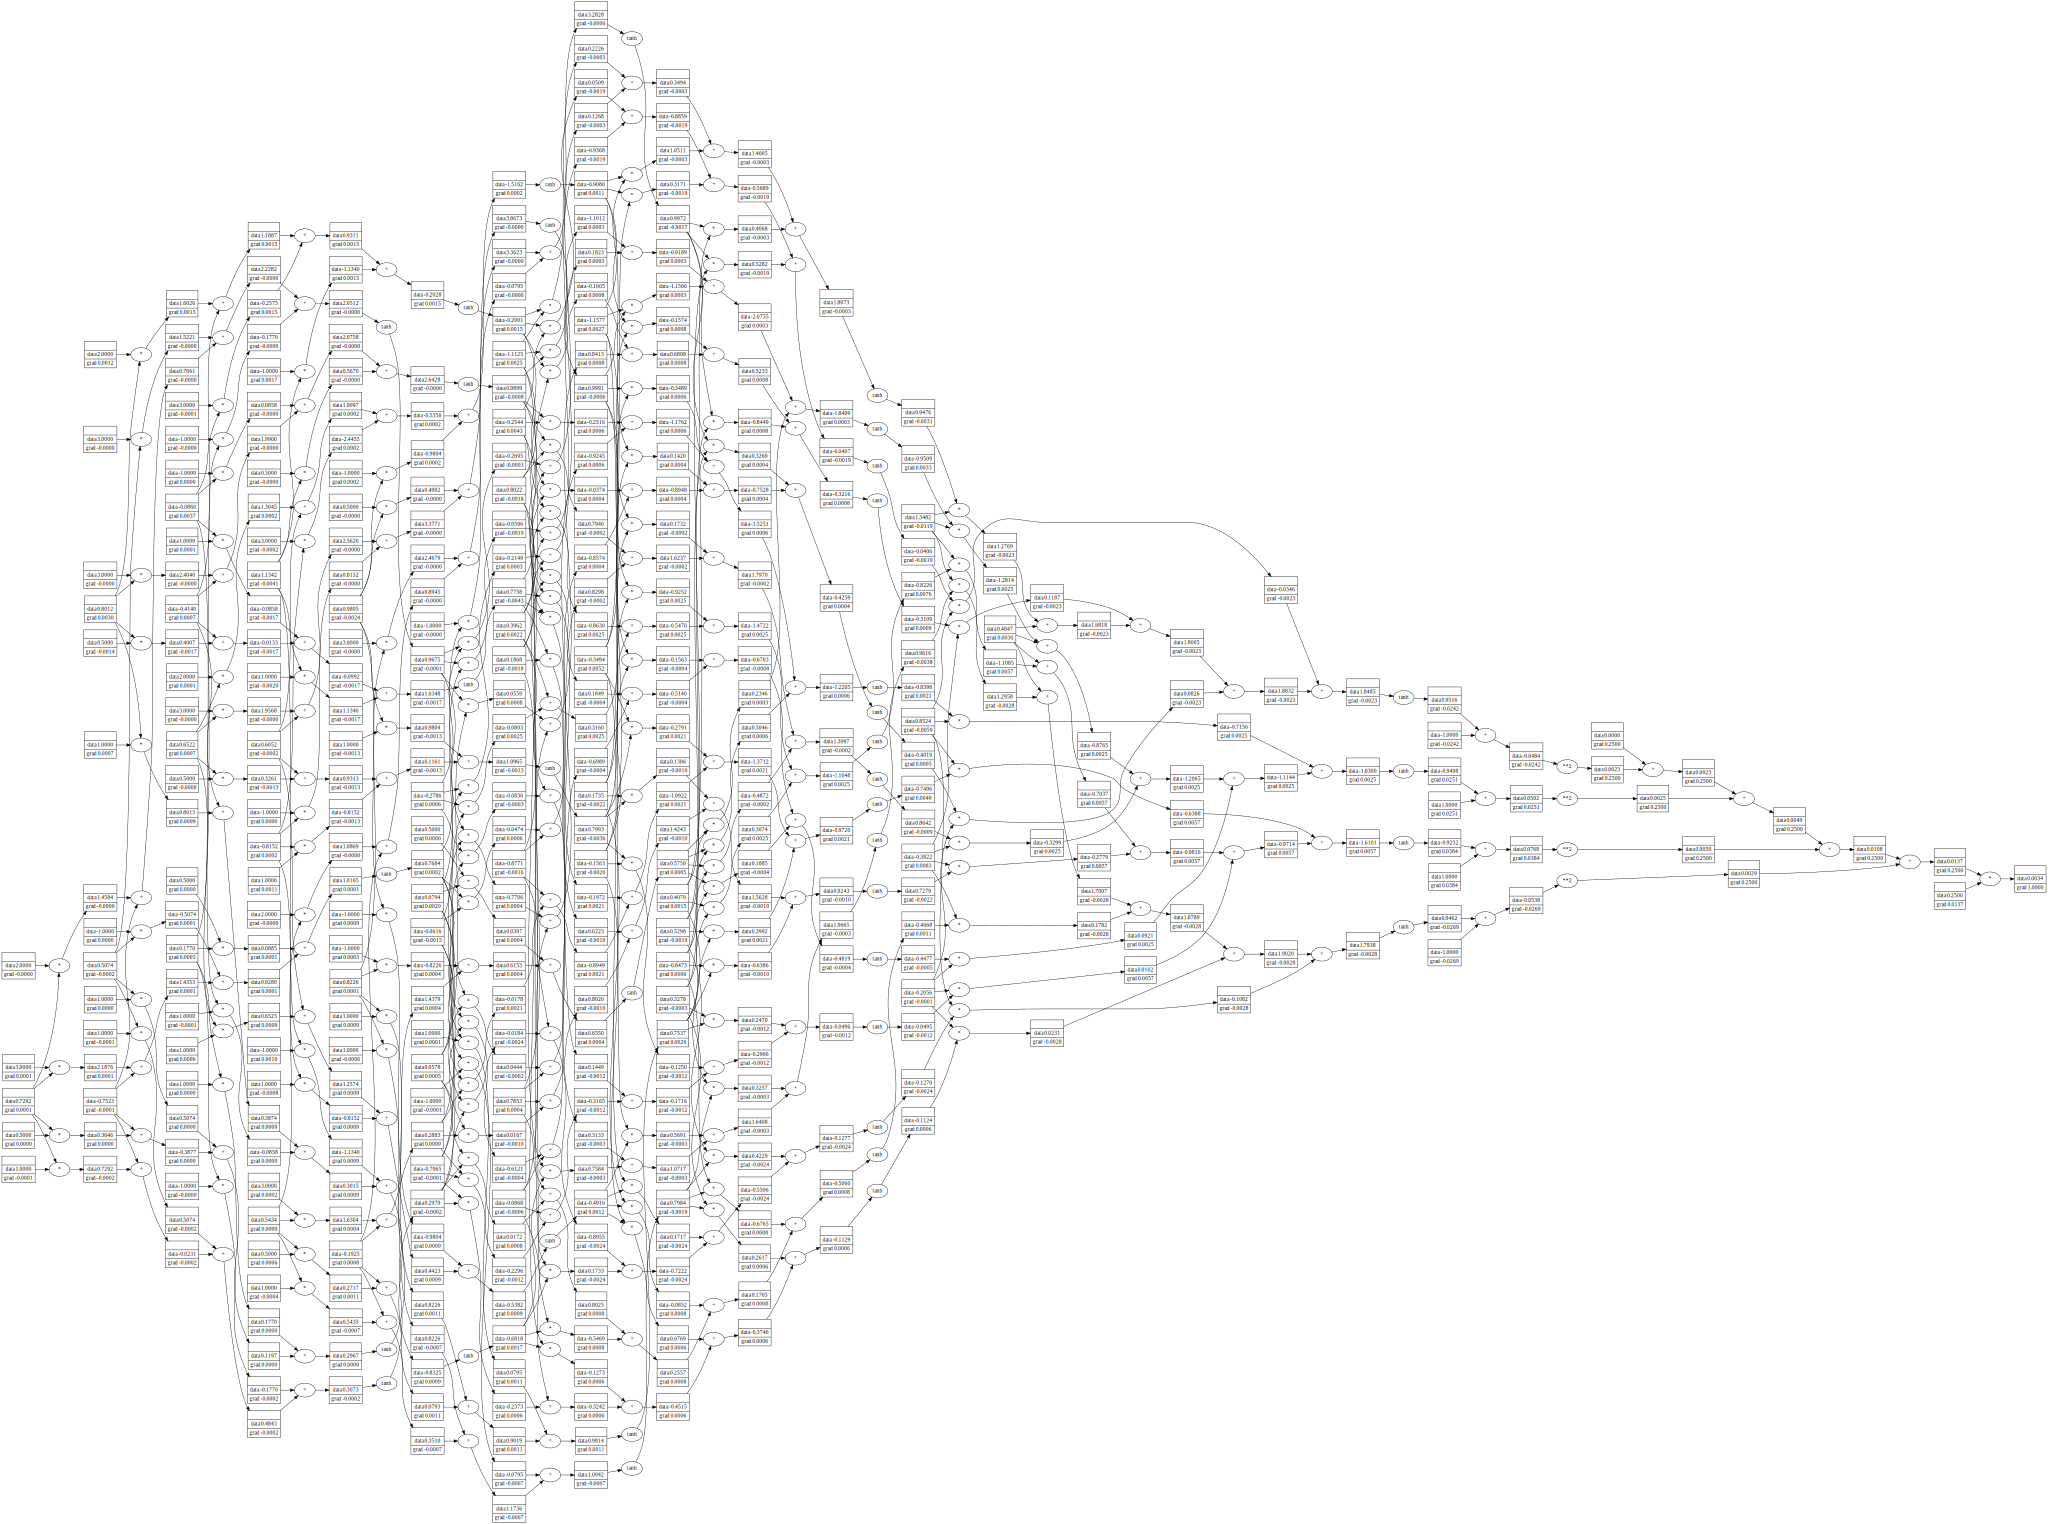

In [10]:
draw_dot(loss)